## Segmenting and Clustering of Neighborhoods in Berlin
---------------------
~Apoorva Saxena
---------------------

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

This project aims to select the safest borough in Berlin based on the **total crimes**, explore the **neighborhoods** of that borough to find the **10 most common venues** in each neighborhood and finally cluster the neighborhoods using **k-mean clustering**.

This report will be targeted to people who are looking to **relocate to Berlin**. Inorder to finalise a neighborhood to hunt for an apartment, **safety** is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The **crime statistics** will provide an insight into this issue.

We will focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* The total number of crimes commited in each of the borough during the last year.
* The most common venues in each of the neighborhood in the safest borough selected.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Preprocessing a real world data set from Kaggle showing the Berlin Crimes from 2012 to 2019](#part1):  A dataset consisting of the crime statistics of each borough in Berlin obtained from Kaggle
- [**Part 2**: Creating a new dataset of the Neighborhoods of the safest borough in Berlin and generating their co-ordinates.](#part2): Co-ordinate of neighborhood will be obtained using **Google Maps API geocoding**


### Part 1: Preprocessing a real world data set from Kaggle showing the Berlin Crimes from 2012 to 2019<a name="part1"></a>


####  Berlin Crime Data 

About this file

- Year: Year of reported counts, 2012-2019
- District: Common name for Berlin borough
- Code: code for Lower Super Output Area in Greater Berlin
- Location: Neighborhood
- Robbery: Robbery incidents
- Street_robbery: Robbery incidents happened at the streets
- Injury: Crime which resulted in injury
- Agg_assault: Crile relating to aggravated assault
- Threat: Crile relating to issuing threats
- Theft: Crile relating to thefts
- Car: Crile relating to stealing of cars
- From_car: Crile relating to breaking into cars
- Bike: Crile relating to stealing of bikes
- Burglary: Crile relating to burglary
- Fire: Crile relating to causing fire
- Arson: Crile relating to arson
- Damage: Crile relating to causing damage
- Graffiti: Crile relating to graffiti
- Drugs: Crile relating to drugs
- Local: local crimes

Data set URL: https://www.kaggle.com/danilzyryanov/crime-in-berlin-2012-2019?select=Berlin_crimes.csv


#### Importing Libraries

In [44]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner

from sklearn.cluster import KMeans # import k-means from clustering stage
from sklearn.preprocessing import LabelBinarizer # Binarize labels in a one-vs-all fashion

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot') # optional: for ggplot-like style

import seaborn as sns

# backend for rendering plots within the browser
%matplotlib inline 
%config InlineBackend.figure_format = "svg"

import requests # library to handle requests

# tranforming json file into a pandas dataframe library
import json
from pandas.io.json import json_normalize

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import folium # map rendering library

from bs4 import BeautifulSoup # Library for parsing HTML and XML documents

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

print('Libraries imported')

Libraries imported


#### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'YPBD4UIL2FU3ICVWLPAIHX25HCGWBPA2Q0K2VVUK1UPCJ5NW' # your Foursquare ID
CLIENT_SECRET = '5YGEJ440XOYGNOFARF3DGGT5YIKNLP25EBFKZWHLJX1RU0OF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YPBD4UIL2FU3ICVWLPAIHX25HCGWBPA2Q0K2VVUK1UPCJ5NW
CLIENT_SECRET:5YGEJ440XOYGNOFARF3DGGT5YIKNLP25EBFKZWHLJX1RU0OF


#### Read in the dataset

In [3]:
# Read into the dataset
df = pd.read_csv(r'C:\Users\apoor\Desktop\Coursera\Project - Capstone\Berlin_crimes_datasets.csv')

In [4]:
# View first five rows of the dataset
df.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [5]:
# Renaming columns
df = df.rename(columns={"District": "Borough",'Location':'Neighborhood'})
df.head()

,Year,Borough,Code,Neighborhood,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


#### Getting most recent crime rates (2019)

In [6]:
df = df[df.Year == 2019].reset_index(drop=True)

In [7]:
# Dropping Code column
df = df.drop(columns=['Year','Code','Local'])

In [8]:
df.head() # view the dataset

,Borough,Neighborhood,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs
0,Mitte,Tiergarten Süd,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231
1,Mitte,Regierungsviertel,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170
2,Mitte,Alexanderplatz,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133
3,Mitte,Brunnenstraße Süd,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86
4,Mitte,Moabit West,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618


#### Let's have a count of each Borough

In [9]:
df['Borough'].value_counts()

Treptow-Köpenick              21
Charlottenburg-Wilmersdorf    18
Pankow                        17
Lichtenberg                   14
Reinickendorf                 12
Mitte                         11
Neukölln                      11
Marzahn-Hellersdorf           10
Spandau                       10
Friedrichshain-Kreuzberg       9
Steglitz-Zehlendorf            9
Tempelhof-Schöneberg           8
Name: Borough, dtype: int64

#### Let's group our main dataset by boroughs and have a mean of each crimes related to each boroughs

In [10]:
Berlin_crime = df.groupby(['Borough'],as_index=False).mean().round(0)

# Adding column Total
Berlin_crime['Total'] = Berlin_crime.iloc[:,1:].sum(axis=1)

Berlin_crime.head()

,Borough,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Total
0,Charlottenburg-Wilmersdorf,23.0,12.0,230.0,54.0,82.0,1254.0,32.0,186.0,172.0,61.0,12.0,7.0,217.0,47.0,65.0,2454.0
1,Friedrichshain-Kreuzberg,91.0,64.0,556.0,195.0,137.0,2850.0,43.0,236.0,455.0,57.0,31.0,11.0,594.0,162.0,581.0,6063.0
2,Lichtenberg,19.0,12.0,217.0,48.0,68.0,831.0,46.0,116.0,118.0,27.0,14.0,6.0,213.0,37.0,38.0,1810.0
3,Marzahn-Hellersdorf,24.0,15.0,297.0,59.0,91.0,860.0,60.0,138.0,78.0,33.0,23.0,9.0,266.0,44.0,54.0,2051.0
4,Mitte,64.0,37.0,690.0,177.0,196.0,3236.0,36.0,303.0,347.0,77.0,26.0,9.0,558.0,146.0,385.0,6287.0


#### Shape of the dataset

In [11]:
print('rows=',Berlin_crime.shape[0])
print('columns=',Berlin_crime.shape[1])

rows= 12
columns= 17


#### Confirming there are no NaN values and correct dtypes in the dataset

In [12]:
Berlin_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Borough         12 non-null     object 
 1   Robbery         12 non-null     float64
 2   Street_robbery  12 non-null     float64
 3   Injury          12 non-null     float64
 4   Agg_assault     12 non-null     float64
 5   Threat          12 non-null     float64
 6   Theft           12 non-null     float64
 7   Car             12 non-null     float64
 8   From_car        12 non-null     float64
 9   Bike            12 non-null     float64
 10  Burglary        12 non-null     float64
 11  Fire            12 non-null     float64
 12  Arson           12 non-null     float64
 13  Damage          12 non-null     float64
 14  Graffiti        12 non-null     float64
 15  Drugs           12 non-null     float64
 16  Total           12 non-null     float64
dtypes: float64(16), object(1)
memory usag

### Part 2: Creating a new dataset of the Neighborhoods of the safest borough in Berlin and generating their co-ordinates.

## Methodology <a name="methodology"></a>

The methodology in this project consists of two parts:
- [Exploratory Data Analysis](#EDA): Visualise the crime rates in the Berlin boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.


- [Modelling](#modelling): To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 3 for this project that will cluster the 17 neighborhoods into 3 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

### Exploratory Data Analysis <a name="EDA"></a>

#### Descriptive statistics of the data

In [13]:
Berlin_crime.iloc[:,1:16].describe()

,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,33.250000,20.000000,315.333333,80.000000,106.750000,1465.916667,40.416667,187.250000,203.583333,57.083333,19.000000,8.000000,313.833333,70.750000,143.333333
std,23.775943,16.431677,167.226756,54.883347,45.104172,866.710968,10.689488,78.008304,119.960947,24.489175,6.980492,2.558409,147.709071,46.912152,170.997253
min,8.000000,5.000000,117.000000,27.000000,41.000000,529.000000,26.000000,83.000000,78.000000,22.000000,10.000000,4.000000,135.000000,24.000000,30.000000
25%,19.750000,10.750000,215.000000,46.000000,78.500000,853.000000,33.500000,130.500000,99.000000,38.250000,12.000000,5.750000,216.000000,36.750000,46.000000
50%,23.500000,13.000000,252.000000,56.500000,93.500000,1133.000000,38.500000,164.000000,188.500000,54.500000,19.500000,8.500000,258.000000,48.500000,63.000000
75%,44.000000,25.000000,382.250000,99.000000,134.000000,1866.000000,45.250000,241.500000,257.000000,78.500000,23.750000,10.250000,384.750000,92.250000,161.500000
max,91.000000,64.000000,690.000000,195.000000,196.000000,3236.000000,60.000000,319.000000,455.000000,97.000000,31.000000,11.000000,594.000000,162.000000,581.000000


#### Sort the total crimes in descenting order to see 5  boroughs with the highest number of crimes 

In [14]:
df_top5 = Berlin_crime.sort_values(by=['Total'], ascending=False)
df_top5 = df_top5.head()
df_top5

,Borough,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Total
4,Mitte,64.0,37.0,690.0,177.0,196.0,3236.0,36.0,303.0,347.0,77.0,26.0,9.0,558.0,146.0,385.0,6287.0
1,Friedrichshain-Kreuzberg,91.0,64.0,556.0,195.0,137.0,2850.0,43.0,236.0,455.0,57.0,31.0,11.0,594.0,162.0,581.0,6063.0
10,Tempelhof-Schöneberg,44.0,25.0,419.0,95.0,172.0,2202.0,58.0,319.0,314.0,97.0,27.0,11.0,450.0,117.0,151.0,4501.0
5,Neukölln,44.0,25.0,370.0,111.0,133.0,1754.0,34.0,258.0,205.0,83.0,20.0,11.0,363.0,50.0,193.0,3654.0
9,Steglitz-Zehlendorf,24.0,14.0,209.0,40.0,96.0,1262.0,45.0,214.0,238.0,86.0,22.0,8.0,301.0,84.0,46.0,2689.0


#### Visualize the five boroughs with the highest number of crimes 

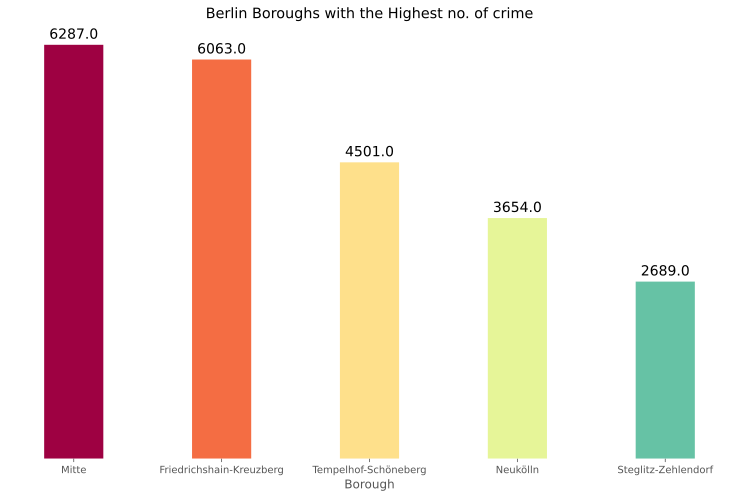

In [15]:
df_tb= df_top5[['Borough','Total']]

colors = [plt.cm.Spectral (i/float(len(df_tb.Borough))) for i in range(len(df_tb.Borough))]

ax = df_tb.plot(kind='bar',x='Borough',y='Total',figsize=(13, 8), rot=0,color = colors,width=0.4,legend=False,edgecolor=None)

ax.set_title('Berlin Boroughs with the Highest no. of crime') # add title to the plot
ax.tick_params(axis='x',labelsize=10)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
ax.get_yaxis().set_visible(False)

# Code to display the text.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

## We'll stay clear from these places :)

#### Similarly, let's sort Berlin Crime dataset in ascending order and visualize the five boroughs with the lowest number of crimes 

In [16]:
df_bottom5 = Berlin_crime.sort_values(by=['Total'], ascending=True)
df_bottom5 = df_bottom5.head()
df_bottom5

,Borough,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Total
11,Treptow-Köpenick,8.0,5.0,117.0,27.0,41.0,529.0,28.0,83.0,102.0,22.0,10.0,5.0,135.0,30.0,30.0,1172.0
2,Lichtenberg,19.0,12.0,217.0,48.0,68.0,831.0,46.0,116.0,118.0,27.0,14.0,6.0,213.0,37.0,38.0,1810.0
7,Reinickendorf,20.0,11.0,218.0,54.0,91.0,832.0,26.0,142.0,90.0,52.0,12.0,5.0,186.0,36.0,70.0,1845.0
3,Marzahn-Hellersdorf,24.0,15.0,297.0,59.0,91.0,860.0,60.0,138.0,78.0,33.0,23.0,9.0,266.0,44.0,54.0,2051.0
8,Spandau,21.0,10.0,274.0,62.0,106.0,969.0,40.0,135.0,90.0,40.0,19.0,10.0,233.0,24.0,61.0,2094.0


#### Visualize the five boroughs with the highest number of crimes 

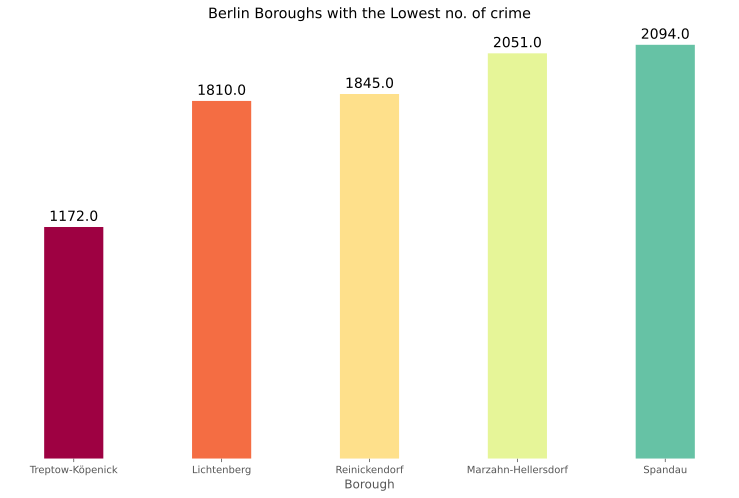

In [17]:
df_tl= df_bottom5[['Borough','Total']]

colors = [plt.cm.Spectral (i/float(len(df_tl.Borough))) for i in range(len(df_tl.Borough))]

ax = df_tl.plot(kind='bar',x='Borough',y='Total',figsize=(13, 8), rot=0,color = colors,width=0.4,legend=False,edgecolor=None)

ax.set_title('Berlin Boroughs with the Lowest no. of crime') # add title to the plot
ax.tick_params(axis='x',labelsize=10)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
ax.get_yaxis().set_visible(False)

# Code to display the text.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

The borough 'Treptow-Köpenick' has the lowest no. of crimes recorded for the year 2019.

#### Hence we will focus on 'Treptow-Köpenick' borough with the least crime

In [18]:
Berlin_crime[Berlin_crime.Borough == 'Treptow-Köpenick'].reset_index(drop=True)

,Borough,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Total
0,Treptow-Köpenick,8.0,5.0,117.0,27.0,41.0,529.0,28.0,83.0,102.0,22.0,10.0,5.0,135.0,30.0,30.0,1172.0


#### Getting all neighborhoods for 'Treptow-Köpenick' borough from main dataset df

In [19]:
df1 = df[df.Borough=='Treptow-Köpenick']
df1 = df1.iloc[:,0:2].reset_index(drop=True)
df1.head()

,Borough,Neighborhood
0,Treptow-Köpenick,Alt-Treptow
1,Treptow-Köpenick,Plänterwald
2,Treptow-Köpenick,Baumschulenweg
3,Treptow-Köpenick,Johannisthal
4,Treptow-Köpenick,Oberschöneweide


#### Finding coordiantes of each Neighborhoods

In [20]:
Latitude = []
Longitude = []

for i in range(len(df1)):
    address = '{},Berlin,Germany'.format(df1.Neighborhood[i])
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    if location != None:
        Latitude.append(location.latitude)
        Longitude.append(location.longitude)
    else:
        Latitude.append(float('Nan'))
        Longitude.append(float('Nan'))
print(Latitude)
print(Longitude)

[52.4925634, 52.4795439, 52.4616938, 52.4459114, 52.4624563, 52.4548197, 52.4378932, nan, 52.4118382, 52.4022426, 52.4154272, nan, 52.474385299999994, 52.43986875, 52.4432963, 52.4121651, 52.4493804, 52.4388819, 52.4549323, nan, nan]
[13.4598743, 13.4788076, 13.4815479, 13.504547, 13.5234762, 13.5178766, 13.5475496, nan, 13.5426461, 13.5706649, 13.5805633, nan, 13.592335530123831, 13.602320001953279, 13.577312, 13.6619543, 13.6262724, 13.718100538301812, 13.5766447, nan, nan]


In [21]:
# Adding Latitude and Longitude Columns in datasets
df1['Latitude'] = Latitude
df1['Longitude'] = Longitude

# Dropping rows with NaN
df1 = df1.dropna(axis=0,how='any')

df1

,Borough,Neighborhood,Latitude,Longitude
0,Treptow-Köpenick,Alt-Treptow,52.492563,13.459874
1,Treptow-Köpenick,Plänterwald,52.479544,13.478808
2,Treptow-Köpenick,Baumschulenweg,52.461694,13.481548
3,Treptow-Köpenick,Johannisthal,52.445911,13.504547
4,Treptow-Köpenick,Oberschöneweide,52.462456,13.523476
5,Treptow-Köpenick,Niederschöneweide,52.454820,13.517877
6,Treptow-Köpenick,Adlershof,52.437893,13.547550
8,Treptow-Köpenick,Altglienicke,52.411838,13.542646
9,Treptow-Köpenick,Bohnsdorf,52.402243,13.570665
10,Treptow-Köpenick,Grünau,52.415427,13.580563


#### Visualize the borough of Treptow-Köpenick

In [22]:
latitude, longitude = [52.4204,13.6200] # Coordinates of Treptow-Köpenick
neigh_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add Neighborhoods and Borough as blue circle markers
for lat, lng, borough, neighbourhood in zip(df1.Latitude, df1.Longitude, df1.Borough, df1.Neighborhood):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.1
    ).add_to(neigh_map)

neigh_map # display map

### Modelling <a name="modelling"></a>

- Finding all the venues within a 500 meters (0.3 miles) radius of each neighborhood.
- Perform one hot ecoding on the venues data.
- Grouping the venues by the neighborhood and calculating their mean.
- Performing a K-means clustering (Defining K = 3)

#### Explore Neighborhoods
#### Let's create a function to repeat the same process to all the neighborhoods

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *df_venues*.

In [24]:
df_venues = getNearbyVenues(names=df1['Neighborhood'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude'],
                                  )

#### What venue dataframe looks like

In [25]:
df_venues.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Alt-Treptow,52.492563,13.459874,Der Holländer,52.491981,13.459416,Garden Center
1,Alt-Treptow,52.492563,13.459874,ELSE,52.495205,13.462637,Nightclub
2,Alt-Treptow,52.492563,13.459874,Tapas No. 6,52.490133,13.456732,Tapas Restaurant
3,Alt-Treptow,52.492563,13.459874,Molecule Man,52.497000,13.459093,Outdoor Sculpture
4,Alt-Treptow,52.492563,13.459874,"Hafenräucherei Treptow ""Löcknitz""",52.493991,13.463445,Seafood Restaurant


In [26]:
# Shape of the dataset
print('rows:{}, columns:{}'.format(df_venues.shape[0],df_venues.shape[1]))

rows:163, columns:7


#### Let's get some basic information for venues dataframe

In [27]:
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            163 non-null    object 
 1   Neighborhood_Latitude   163 non-null    float64
 2   Neighborhood_Longitude  163 non-null    float64
 3   Venue                   163 non-null    object 
 4   Venue_Latitude          163 non-null    float64
 5   Venue_Longitude         163 non-null    float64
 6   Venue_Category          163 non-null    object 
dtypes: float64(4), object(3)
memory usage: 9.0+ KB


#### Value-counts is a good way of understanding how many Venue Category we have.

In [28]:
df_venues['Venue_Category'].value_counts()

Café                         19
German Restaurant             9
Supermarket                   7
Ice Cream Shop                6
Italian Restaurant            6
Drugstore                     6
Tram Station                  5
Bus Stop                      4
Plaza                         4
Greek Restaurant              4
Asian Restaurant              4
Electronics Store             4
Bakery                        3
Gym / Fitness Center          3
Light Rail Station            3
Burger Joint                  3
Clothing Store                3
Park                          3
Pizza Place                   2
Dessert Shop                  2
Beer Garden                   2
Bank                          2
Sushi Restaurant              2
Trattoria/Osteria             2
Indian Restaurant             2
Brewery                       2
History Museum                2
Restaurant                    2
Beach                         2
Harbor / Marina               2
Fast Food Restaurant          1
Food Cou

#### Let's us count the unique values for Venue Category 

In [29]:
print('Count of Venue Category {}'.format(len(df_venues['Venue_Category'].unique())))

Count of Venue Category 73


#### Let's analyze each Neighborhood

In [30]:
df_venue_dummy = pd.get_dummies(df_venues[['Venue_Category']],prefix='',prefix_sep ='') # One hot encoding
df_venue_dummy.insert(0,'Neighborhood',df_venues['Neighborhood']) # Inserting Neighborhood coloumn at the beginning from df_venues

In [31]:
df_venue_dummy.head() # Visualizing Dataframe

,Neighborhood,ATM,American Restaurant,Asian Restaurant,Bakery,Bank,Bar,Beach,Beer Garden,Big Box Store,Boat or Ferry,Bookstore,Brewery,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Clothing Store,Cocktail Bar,Convenience Store,Dessert Shop,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food Court,Garden Center,Gas Station,German Restaurant,Greek Restaurant,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Italian Restaurant,Light Rail Station,Mexican Restaurant,Miscellaneous Shop,Motel,Movie Theater,Multiplex,Nightclub,Organic Grocery,Outdoor Sculpture,Palace,Park,Pizza Place,Platform,Plaza,Post Office,Pub,Restaurant,Seafood Restaurant,Shipping Store,Shoe Store,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tram Station,Trattoria/Osteria,Vietnamese Restaurant,Warehouse Store
0,Alt-Treptow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alt-Treptow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alt-Treptow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Alt-Treptow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alt-Treptow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
print('Rows {}, Columns {}'.format(df_venue_dummy.shape[0],df_venue_dummy.shape[1]))

Rows 163, Columns 74


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [33]:
df_group_neigh = df_venue_dummy.groupby(['Neighborhood']).mean().reset_index()
df_group_neigh.head()

,Neighborhood,ATM,American Restaurant,Asian Restaurant,Bakery,Bank,Bar,Beach,Beer Garden,Big Box Store,Boat or Ferry,Bookstore,Brewery,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Clothing Store,Cocktail Bar,Convenience Store,Dessert Shop,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food Court,Garden Center,Gas Station,German Restaurant,Greek Restaurant,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Italian Restaurant,Light Rail Station,Mexican Restaurant,Miscellaneous Shop,Motel,Movie Theater,Multiplex,Nightclub,Organic Grocery,Outdoor Sculpture,Palace,Park,Pizza Place,Platform,Plaza,Post Office,Pub,Restaurant,Seafood Restaurant,Shipping Store,Shoe Store,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tram Station,Trattoria/Osteria,Vietnamese Restaurant,Warehouse Store
0,Adlershof,0.00,0.0,0.0,0.000000,0.125,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.125000,0.000000,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.125,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.125,0.125,0.00,0.000000,0.0,0.0,0.125,0.000000,0.000000
1,Allende-Viertel,0.25,0.0,0.0,0.000000,0.000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.25,0.250000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.25,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000,0.00,0.000000,0.0,0.0,0.000,0.000000,0.000000
2,Alt-Treptow,0.00,0.0,0.0,0.090909,0.000,0.00,0.0,0.045455,0.045455,0.0,0.0,0.00,0.0,0.00,0.090909,0.0,0.0,0.00,0.0,0.0,0.0,0.045455,0.045455,0.0,0.00,0.0,0.0,0.00,0.045455,0.0,0.0,0.000,0.045455,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.045455,0.045455,0.045455,0.0,0.0,0.0,0.045455,0.045455,0.0,0.045455,0.00,0.00,0.0,0.045455,0.000,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.000,0.000,0.00,0.045455,0.0,0.0,0.000,0.045455,0.045455
3,Altglienicke,0.00,0.0,0.0,0.000000,0.000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.000,0.000,0.00,0.000000,0.0,0.0,0.000,0.000000,0.000000
4,Altstadt-Kietz,0.00,0.0,0.0,0.000000,0.000,0.04,0.0,0.040000,0.000000,0.0,0.0,0.04,0.0,0.00,0.240000,0.0,0.0,0.04,0.0,0.0,0.0,0.000000,0.000000,0.0,0.04,0.0,0.0,0.00,0.000000,0.0,0.2,0.040,0.040000,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.040000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.04,0.04,0.0,0.000000,0.080,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000,0.04,0.000000,0.0,0.0,0.000,0.000000,0.000000


#### Let's look at the shape of the new dataset

In [34]:
print('Rows {}, Columns {}'.format(df_group_neigh.shape[0],df_group_neigh.shape[1]))

Rows 17, Columns 74


#### Let's make a function named top_venue() which will prints venues for each neighborhood

In [35]:
def top_venue(n): # n = number of top venues ex: for top five veneus put num_top_venues = 5
    for i in df_group_neigh['Neighborhood']:
        print('---',i,'---')
        temp = df_group_neigh[df_group_neigh['Neighborhood']==i].T.reset_index()
        temp.columns = ['Venue', 'Frequency']
        temp = temp.iloc[1:]
        temp['Frequency'] = temp['Frequency'].astype('float64')
        temp = temp.round({'Frequency':1})
        print(temp.sort_values('Frequency',ascending=False).reset_index(drop=True).head(n))
        print('\n')    

#### Let's print top 5 veneues

In [36]:
top_venue(5)

--- Adlershof ---
                Venue  Frequency
0               Plaza        0.1
1  Italian Restaurant        0.1
2    Greek Restaurant        0.1
3           Drugstore        0.1
4         Supermarket        0.1


--- Allende-Viertel ---
        Venue  Frequency
0         ATM        0.2
1        Café        0.2
2    Bus Stop        0.2
3  Food Court        0.2
4       Plaza        0.0


--- Alt-Treptow ---
         Venue  Frequency
0       Bakery        0.1
1         Café        0.1
2          ATM        0.0
3    Multiplex        0.0
4  Pizza Place        0.0


--- Altglienicke ---
            Venue  Frequency
0  Shipping Store        1.0
1             ATM        0.0
2        Platform        0.0
3            Park        0.0
4          Palace        0.0


--- Altstadt-Kietz ---
               Venue  Frequency
0               Café        0.2
1  German Restaurant        0.2
2              Plaza        0.1
3                ATM        0.0
4          Nightclub        0.0


--- Baumschule

#### Putting above data into dataframe
##### Let's write a function which will sort the venues in descending order

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [38]:
num_top_venues = 10

# create columns according to number of top venues
columns = ['Neighborhood','1st Most Common Venue',
           '2nd Most Common Venue','3rd Most Common Venue', 
           '4th Most Common Venue', '5th Most Common Venue', 
           '6th Most Common Venue', '7th Most Common Venue', 
           '8th Most Common Venue', '9th Most Common Venue', 
           '10th Most Common Venue']

# create a new dataframe
df_neigh_ven_sort = pd.DataFrame(columns=columns)
df_neigh_ven_sort['Neighborhood'] = df_group_neigh['Neighborhood']

for i in range(len(df_group_neigh)):
    df_neigh_ven_sort.iloc[i, 1:] = return_most_common_venues(df_group_neigh.iloc[i, :], num_top_venues)

df_neigh_ven_sort.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlershof,Trattoria/Osteria,Greek Restaurant,Bank,Supermarket,Steakhouse,Drugstore,Plaza,Italian Restaurant,Warehouse Store,Farmers Market
1,Allende-Viertel,ATM,Café,Bus Stop,Food Court,Fast Food Restaurant,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market
2,Alt-Treptow,Bakery,Café,Warehouse Store,Platform,Gym / Fitness Center,Vietnamese Restaurant,Electronics Store,Drugstore,Italian Restaurant,Light Rail Station
3,Altglienicke,Shipping Store,Warehouse Store,Fast Food Restaurant,Dessert Shop,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market,Flower Shop
4,Altstadt-Kietz,Café,German Restaurant,Plaza,Greek Restaurant,Cocktail Bar,Palace,Ice Cream Shop,Sushi Restaurant,Bar,Park


#### Let's look at the shape of the new dataset

In [39]:
print('Rows {}, Columns {}'.format(df_neigh_ven_sort.shape[0],df_neigh_ven_sort.shape[1]))

Rows 17, Columns 11


#### Clustering neighborhoods into 6 clusters using k-means

In [40]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
df_k_means = df_group_neigh.drop('Neighborhood',1)
k_means.fit(df_k_means)
labels = k_means.labels_

print(labels)

[0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 1 0]


In [41]:
df_neigh_ven_sort.insert(0,'Cluster Labels',labels) # Inserting Cluster Label coloumn

Merging the dataframe

In [42]:
df_merge = df1.merge(df_neigh_ven_sort, on='Neighborhood')
df_merge.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Treptow-Köpenick,Alt-Treptow,52.492563,13.459874,0,Bakery,Café,Warehouse Store,Platform,Gym / Fitness Center,Vietnamese Restaurant,Electronics Store,Drugstore,Italian Restaurant,Light Rail Station
1,Treptow-Köpenick,Plänterwald,52.479544,13.478808,1,Bus Stop,Supermarket,Light Rail Station,Warehouse Store,Fast Food Restaurant,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market
2,Treptow-Köpenick,Baumschulenweg,52.461694,13.481548,0,Asian Restaurant,Supermarket,Ice Cream Shop,Drugstore,Warehouse Store,Flower Shop,Doner Restaurant,Electronics Store,Falafel Restaurant,Farmers Market
3,Treptow-Köpenick,Johannisthal,52.445911,13.504547,0,Park,Tram Station,Taverna,Pizza Place,Sushi Restaurant,Movie Theater,Dessert Shop,Pub,Electronics Store,Convenience Store
4,Treptow-Köpenick,Oberschöneweide,52.462456,13.523476,0,Supermarket,Café,Burger Joint,Pizza Place,German Restaurant,Falafel Restaurant,History Museum,Asian Restaurant,Tram Station,Bank


In [45]:
# create map
# latitude, longitude = [52.4204,13.6200] # Coordinates of Treptow-Köpenick
cluster_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Neighborhood'], df_merge['Cluster Labels']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_map)
       
cluster_map

## Analysis <a name="analysis"></a>

Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

## Examine Clusters
Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

##### Cluster 1

In [46]:
cluster_1 = df_merge[df_merge['Cluster Labels']==0]
cluster_1

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Treptow-Köpenick,Alt-Treptow,52.492563,13.459874,0,Bakery,Café,Warehouse Store,Platform,Gym / Fitness Center,Vietnamese Restaurant,Electronics Store,Drugstore,Italian Restaurant,Light Rail Station
2,Treptow-Köpenick,Baumschulenweg,52.461694,13.481548,0,Asian Restaurant,Supermarket,Ice Cream Shop,Drugstore,Warehouse Store,Flower Shop,Doner Restaurant,Electronics Store,Falafel Restaurant,Farmers Market
3,Treptow-Köpenick,Johannisthal,52.445911,13.504547,0,Park,Tram Station,Taverna,Pizza Place,Sushi Restaurant,Movie Theater,Dessert Shop,Pub,Electronics Store,Convenience Store
4,Treptow-Köpenick,Oberschöneweide,52.462456,13.523476,0,Supermarket,Café,Burger Joint,Pizza Place,German Restaurant,Falafel Restaurant,History Museum,Asian Restaurant,Tram Station,Bank
5,Treptow-Köpenick,Niederschöneweide,52.454820,13.517877,0,Beach,Motel,Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Miscellaneous Shop,Greek Restaurant,Convenience Store
6,Treptow-Köpenick,Adlershof,52.437893,13.547550,0,Trattoria/Osteria,Greek Restaurant,Bank,Supermarket,Steakhouse,Drugstore,Plaza,Italian Restaurant,Warehouse Store,Farmers Market
8,Treptow-Köpenick,Bohnsdorf,52.402243,13.570665,0,Ice Cream Shop,Electronics Store,Insurance Office,Italian Restaurant,Warehouse Store,Flower Shop,Doner Restaurant,Drugstore,Falafel Restaurant,Farmers Market
9,Treptow-Köpenick,Grünau,52.415427,13.580563,0,Dessert Shop,Boat or Ferry,Tram Station,Historic Site,Café,Restaurant,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant
11,Treptow-Köpenick,Allende-Viertel,52.439869,13.602320,0,ATM,Café,Bus Stop,Food Court,Fast Food Restaurant,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market
12,Treptow-Köpenick,Altstadt-Kietz,52.443296,13.577312,0,Café,German Restaurant,Plaza,Greek Restaurant,Cocktail Bar,Palace,Ice Cream Shop,Sushi Restaurant,Bar,Park


The cluster 1 has cluster with 12 of the 16 neighborhoods in the borough Treptow-Köpenick. Upon closely examining these neighborhoods we can see that the most common restaurants in these neighborhoods are Falafel and Fast Food Restaurants. It also has a Bus Stop and Tram Station for public transportation.

##### Cluster 2

In [47]:
cluster_2 = df_merge[df_merge['Cluster Labels']==1]
cluster_2

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Treptow-Köpenick,Plänterwald,52.479544,13.478808,1,Bus Stop,Supermarket,Light Rail Station,Warehouse Store,Fast Food Restaurant,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market
10,Treptow-Köpenick,Köpenick-Süd,52.474385,13.592336,1,Tram Station,Bus Stop,Warehouse Store,Flower Shop,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant


##### Cluster 3

In [48]:
cluster_3 = df_merge[df_merge['Cluster Labels']==2]
cluster_3.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Treptow-Köpenick,Altglienicke,52.411838,13.542646,2,Shipping Store,Warehouse Store,Fast Food Restaurant,Dessert Shop,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market,Flower Shop


In [49]:
print('Number of neighborhoods in cluster-1: {}, cluster-2: {}, cluster-3: {}'.format(len(cluster_1),len(cluster_2),len(cluster_3)))

Number of neighborhoods in cluster-1: 14, cluster-2: 2, cluster-3: 1


#### Clusters 1 and 3 are the biggest with twelve and three neighborhood respectively. 
#### Cluster 2 has only one neighbourhood.

## Results and Discussion <a name="results"></a>

The aim of this project is to help people who want to relocate to the safest borough in Berlin, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 1 has Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in clusters 2 & 3 are suitable. For a family I feel that the neighborhoods in Cluster 2 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Restaurants and Electronics Stores which is ideal for a family.

## Conclusion <a name="conclusion"></a>

This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of Berlin. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.  